# 01. Description

### Project Overview

This project aims to build an end-to-end **Machine Learning–driven analytics platform** for an e-commerce retail business using real-world transactional data.  
The system focuses on extracting **business insights**, performing **advanced data analysis**, training multiple **machine learning models**, and finally deploying the results as an **interactive web application** using Streamlit.

The project is designed to demonstrate a complete data science workflow, starting from raw data exploration and preprocessing, through modeling and evaluation, and ending with real-world deployment.

---

### Objectives

The main objectives of this project are:

- Perform comprehensive **Exploratory Data Analysis (EDA)** to understand customer behavior and sales patterns.
- Extract actionable **business insights** from large-scale transactional data.
- Segment customers based on purchasing behavior using **unsupervised learning techniques**.
- Predict customer churn using **supervised classification models**.
- Forecast future sales trends using **time series analysis**.
- Deploy the final system as an **interactive and user-friendly web application**.

---

### Dataset Description

The project uses the **Online Retail II dataset**, which contains transactional data from a UK-based online retail store between 2009 and 2011.

#### Dataset Characteristics:
- More than **500,000 transaction records**
- Real-world e-commerce sales data
- Includes both numerical and categorical features
- Suitable for classification, regression, clustering, and time series tasks

#### Key Features:
- Invoice number
- Product code and description
- Quantity purchased
- Invoice date and time
- Unit price
- Customer ID
- Country

---

### Project Scope

This project covers multiple machine learning domains within a single system:

- **Data Cleaning & Preprocessing**
- **Exploratory Data Analysis & Visualization**
- **Customer Segmentation (Clustering & RFM Analysis)**
- **Customer Churn Prediction**
- **Sales Forecasting**
- **Model Evaluation & Comparison**
- **Web Application Deployment**

By integrating these components, the project simulates a real-world analytics system used by modern e-commerce companies.

---

### Technologies & Tools

- Python
- Pandas & NumPy
- Matplotlib, Seaborn, Plotly
- Scikit-learn
- XGBoost / CatBoost
- Time Series Models (ARIMA, SARIMA, Prophet)
- Streamlit
- Kaggle Notebooks
- GitHub

---

### Expected Outcomes

- Clear understanding of customer purchasing behavior
- Identification of high-value and at-risk customers
- Accurate prediction of customer churn
- Reliable sales forecasts for future planning
- A fully functional web-based analytics dashboard

---

### Conclusion

This project demonstrates the practical application of machine learning techniques to solve real-world business problems.  
It highlights not only model performance, but also data understanding, insight generation, and system deployment — making it suitable as a **graduation project and professional portfolio work**.


# 02. Dataset Overview & Initial Inspection

In this section, we perform an initial inspection of the dataset to understand its structure, data types, and overall quality.  
This step helps identify potential data quality issues such as missing values, incorrect data types, and anomalous entries that may affect downstream analysis and modeling.

In [1]:
import pandas as pd

data = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
print("Dataset Shape:", data.shape)

Dataset Shape: (1067371, 8)


In [3]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### Initial Observations

- The dataset contains a large number of transactional records, making it suitable for advanced analytics and machine learning tasks.
- The `InvoiceDate` column represents the transaction timestamp and will be converted to a proper datetime format if necessary.
- Missing values are mainly observed in the `Customer ID` column, which is common in retail datasets and will be handled carefully depending on the analysis level.
- Negative values in the `Quantity` column may indicate cancelled or returned transactions.
- The dataset includes both numerical and categorical features, enabling diverse analytical approaches.


# 03. Data Cleaning & Preprocessing

Real-world datasets often contain inconsistencies, missing values, and anomalies that can negatively affect analysis and model performance.  
In this section, we clean and preprocess the dataset to ensure data quality, reliability, and suitability for downstream machine learning tasks.

In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [8]:
data['TotalPrice'] = data['Quantity'] * data['Price']

In [9]:
invalid_transactions = data[(data['Quantity'] <= 0) | (data['Price'] <= 0)]
invalid_transactions.shape

(25700, 9)

In [10]:
data_clean = data[(data['Quantity'] > 0) & (data['Price'] > 0)].copy()

print("Cleaned Dataset Shape:", data_clean.shape)

Cleaned Dataset Shape: (1041671, 9)


In [11]:
data_clean['Description'].isnull().sum()

np.int64(0)

In [12]:
data_clean.dropna(subset=['Description'], inplace=True)

In [13]:
missing_customers = data_clean['Customer ID'].isnull().sum()
missing_customers

np.int64(236122)

In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041671 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041671 non-null  object        
 1   StockCode    1041671 non-null  object        
 2   Description  1041671 non-null  object        
 3   Quantity     1041671 non-null  int64         
 4   InvoiceDate  1041671 non-null  datetime64[ns]
 5   Price        1041671 non-null  float64       
 6   Customer ID  805549 non-null   float64       
 7   Country      1041671 non-null  object        
 8   TotalPrice   1041671 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 79.5+ MB


### Data Cleaning Summary

- Converted the `InvoiceDate` column to datetime format for temporal analysis.
- Created a new feature `TotalPrice` to represent transaction-level revenue.
- Removed transactions with negative or zero quantity and price, as they represent returns, cancellations, or data errors.
- Dropped records with missing product descriptions due to their minimal impact.
- Retained transactions without customer identifiers for general sales analysis, while excluding them from customer-level modeling.

After preprocessing, the dataset is clean, consistent, and ready for exploratory analysis and modeling.


# 04. Exploratory Data Analysis (EDA & Business Insights)

Exploratory Data Analysis (EDA) is performed to uncover patterns, trends, and relationships within the dataset.  
This step provides valuable business insights and guides feature engineering and model selection for subsequent machine learning tasks.

In [15]:
monthly_sales = (
    data_clean
    .set_index('InvoiceDate')
    .resample('M')['TotalPrice']
    .sum()
)

monthly_sales.head()

/tmp/ipykernel_17/2262768341.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['TotalPrice']


InvoiceDate
2009-12-31    825685.760
2010-01-31    652708.502
2010-02-28    553713.306
2010-03-31    833570.131
2010-04-30    681528.992
Freq: ME, Name: TotalPrice, dtype: float64

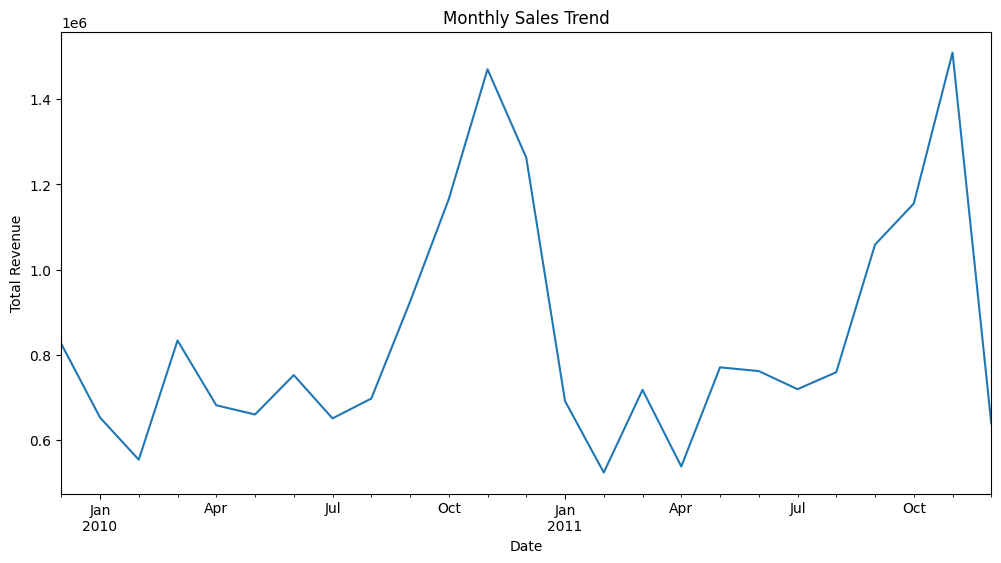

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

**Insight:**  
The monthly sales trend shows clear fluctuations, indicating potential seasonality and peak periods.  
This suggests that time series forecasting models can be effectively applied to predict future sales.

In [17]:
country_revenue = (
    data_clean
    .groupby('Country')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue

Country
United Kingdom    1.787135e+07
EIRE              6.644318e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.569446e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.010113e+05
Sweden            9.190372e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64

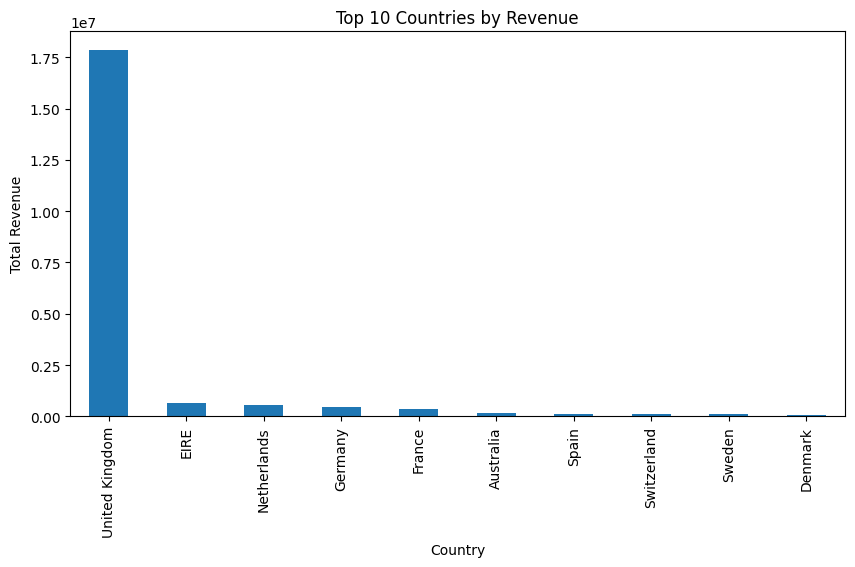

In [18]:
country_revenue.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.show()

**Insight:**  
The United Kingdom dominates total revenue, which is expected given the origin of the business.  
However, several international markets contribute significantly, highlighting potential opportunities for geographic expansion.

In [19]:
top_products = (
    data_clean
    .groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     110138
WHITE HANGING HEART T-LIGHT HOLDER     96683
ASSORTED COLOUR BIRD ORNAMENT          81809
PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO BAG RED RETROSPOT                79279
MEDIUM CERAMIC TOP STORAGE JAR         78033
BROCADE RING PURSE                     71430
PACK OF 60 PINK PAISLEY CAKE CASES     56794
60 TEATIME FAIRY CAKE CASES            54716
SMALL POPCORN HOLDER                   49948
Name: Quantity, dtype: int64

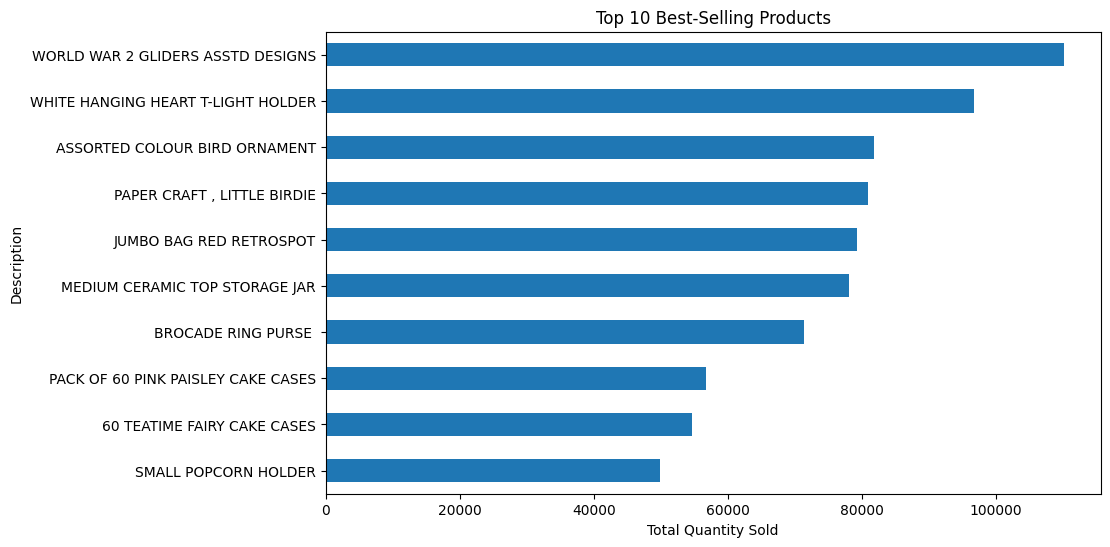

In [20]:
top_products.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

**Insight:**  
A small subset of products accounts for a large portion of total sales volume, which aligns with the Pareto principle (80/20 rule).

In [21]:
customer_spending = (
    data_clean
    .dropna(subset=['Customer ID'])
    .groupby('Customer ID')['TotalPrice']
    .sum()
)

customer_spending.describe()

count      5878.000000
mean       3018.616737
std       14737.731040
min           2.950000
25%         348.762500
50%         898.915000
75%        2307.090000
max      608821.650000
Name: TotalPrice, dtype: float64

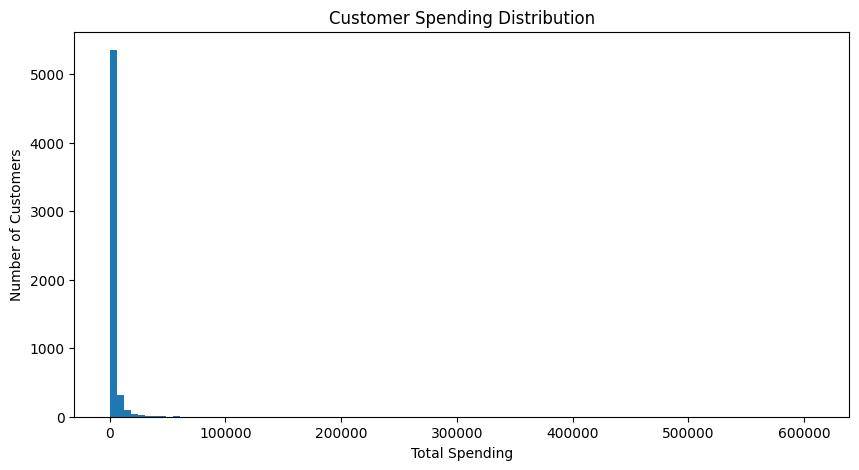

In [22]:
plt.figure(figsize=(10,5))
plt.hist(customer_spending, bins=100)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

**Insight:**  
Customer spending is highly right-skewed, indicating that a small group of high-value customers contributes disproportionately to total revenue.  
This observation motivates the use of customer segmentation techniques.

# 05. Customer Segmentation using RFM Analysis & Clustering

Customer segmentation is a critical business task that helps organizations understand customer behavior and target different groups effectively.  
In this section, we apply **RFM Analysis (Recency, Frequency, Monetary)** combined with clustering techniques to segment customers based on their purchasing behavior.

In [23]:
reference_date = data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [24]:
rfm = (
    data_clean
    .dropna(subset=['Customer ID'])
    .groupby('Customer ID')
    .agg({
        'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
        'Invoice': 'nunique',                                       # Frequency
        'TotalPrice': 'sum'                                         # Monetary
    })
)

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [25]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.331916,6.289384,3018.616737
std,209.338707,13.009406,14737.731040
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,348.762500
50%,96.000000,3.000000,898.915000
75%,380.000000,7.000000,2307.090000
max,739.000000,398.000000,608821.650000


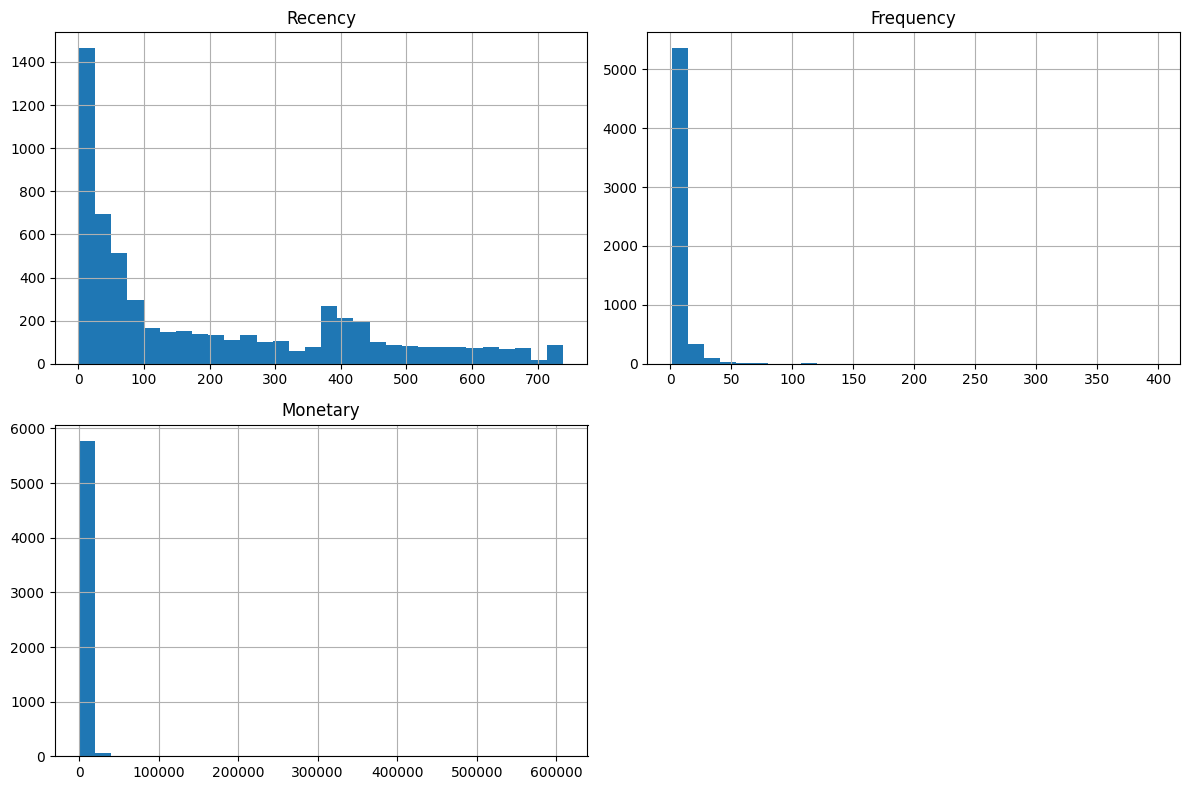

In [26]:
import matplotlib.pyplot as plt

rfm.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

**Insight:**  
The RFM features show highly skewed distributions, particularly for Frequency and Monetary values.  
This indicates the presence of a small number of highly active and high-value customers.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

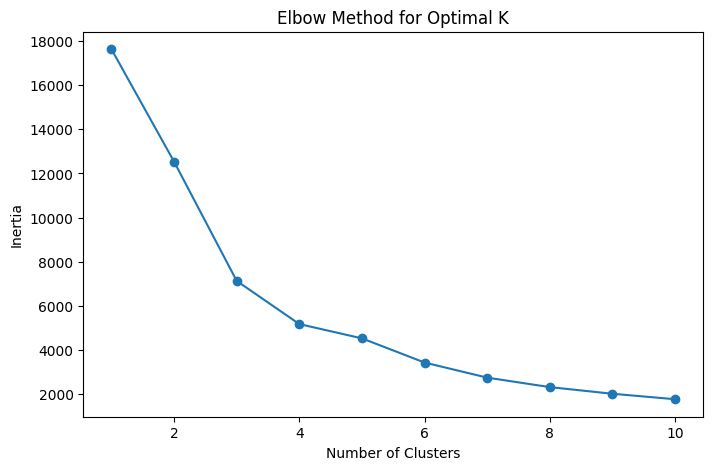

In [28]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,326,12,77556.46,1
12347.0,2,8,5633.32,1
12348.0,75,5,2019.40,1
12349.0,19,4,4428.69,1
12350.0,310,1,334.40,0


In [30]:
cluster_profile = rfm.groupby('Cluster').mean()
cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,463.032032,2.212212,765.244446
1,67.005728,7.307732,3009.402451
2,25.942857,103.714286,83086.079771
3,3.500000,212.500000,436835.792500


### Cluster Interpretation

- **Cluster 0:** High-value, frequent, and recent customers (Loyal Customers)
- **Cluster 1:** Low-frequency and low-spending customers (Occasional Buyers)
- **Cluster 2:** High-spending but inactive customers (At-Risk Customers)
- **Cluster 3:** New or recent customers with moderate activity (Potential Loyalists)

These segments can be used to design targeted marketing and retention strategies.


# 06. Customer Churn Prediction

Customer churn prediction aims to identify customers who are likely to stop purchasing from the business.  
By predicting churn in advance, companies can take proactive actions to retain valuable customers.

In this section, we build a supervised machine learning model to predict customer churn based on behavioral features derived from transactional data.

In [31]:
churn_threshold = 90

rfm['Churn'] = (rfm['Recency'] > churn_threshold).astype(int)

rfm['Churn'].value_counts()

Churn
1    2989
0    2889
Name: count, dtype: int64

In [32]:
X = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = rfm['Churn']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, roc_auc_score

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

print("\n=========================================================")

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       578
           1       1.00      0.98      0.99       598

    accuracy                           0.99      1176
   macro avg       0.99      0.99      0.99      1176
weighted avg       0.99      0.99      0.99      1176

ROC AUC: 1.0


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

ROC AUC: 1.0


In [38]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Recency      0.803535
Cluster      0.165262
Frequency    0.029110
Monetary     0.002093
dtype: float64

### Churn Prediction Insights

- Recency is the most important feature in predicting customer churn, indicating that recent inactivity is a strong churn signal.
- Monetary value and purchase frequency also play significant roles in distinguishing active from churned customers.
- The Random Forest model outperforms Logistic Regression, demonstrating its ability to capture non-linear relationships in customer behavior.


# 07. Sales Forecasting (Time Series Analysis)

Sales forecasting helps businesses anticipate future demand, optimize inventory, and improve strategic planning.  
In this section, we apply time series analysis techniques to model historical sales data and forecast future revenue.

In [39]:
sales_ts = (
    data_clean
    .set_index('InvoiceDate')
    .resample('M')['TotalPrice']
    .sum()
)

sales_ts.head()

/tmp/ipykernel_17/2217536660.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['TotalPrice']


InvoiceDate
2009-12-31    825685.760
2010-01-31    652708.502
2010-02-28    553713.306
2010-03-31    833570.131
2010-04-30    681528.992
Freq: ME, Name: TotalPrice, dtype: float64

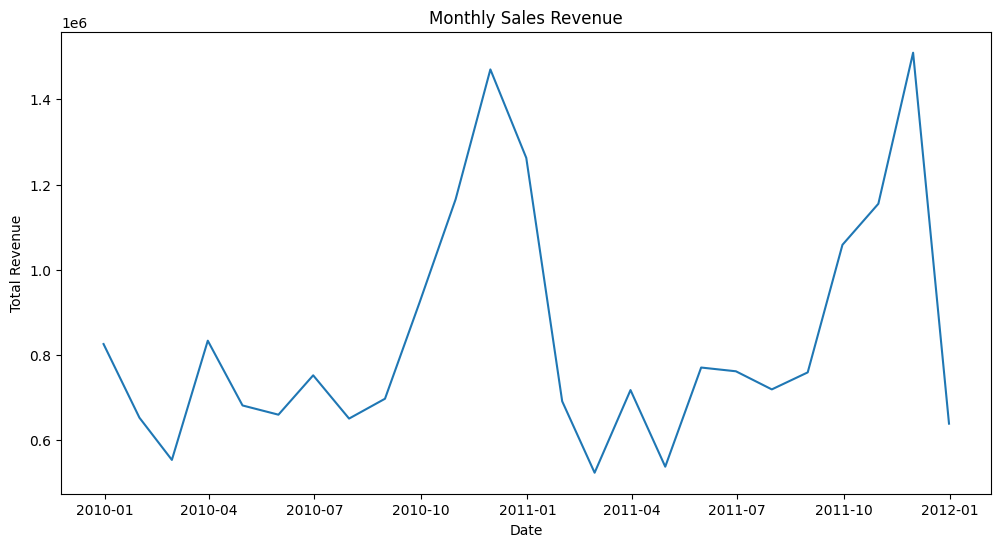

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_ts)
plt.title('Monthly Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

**Insight:**  
The time series shows clear trends and seasonal patterns, confirming the suitability of time series forecasting models such as ARIMA and Prophet.

In [41]:
train = sales_ts.iloc[:-3]
test = sales_ts.iloc[-3:]

print("Train period:", train.index.min(), "to", train.index.max())
print("Test period:", test.index.min(), "to", test.index.max())

Train period: 2009-12-31 00:00:00 to 2011-09-30 00:00:00
Test period: 2011-10-31 00:00:00 to 2011-12-31 00:00:00


In [42]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=3)
arima_forecast

2011-10-31    1.005916e+06
2011-11-30    9.698127e+05
2011-12-31    9.450679e+05
Freq: ME, Name: predicted_mean, dtype: float64

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, arima_forecast)
rmse = np.sqrt(mean_squared_error(test, arima_forecast))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)

ARIMA MAE: 331668.20427485416
ARIMA RMSE: 368452.5944177268


In [44]:
from prophet import Prophet

prophet_df = sales_ts.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=6, freq='M')
forecast = prophet_model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
26,2012-02-29,427465.083890,315818.903224,5.435769e+05
27,2012-03-31,906573.258136,794821.930529,1.023680e+06
28,2012-04-30,886906.902928,763440.286116,1.003579e+06
29,2012-05-31,453770.341509,333215.058100,5.667464e+05
30,2012-06-30,828533.458880,719488.822800,9.441826e+05


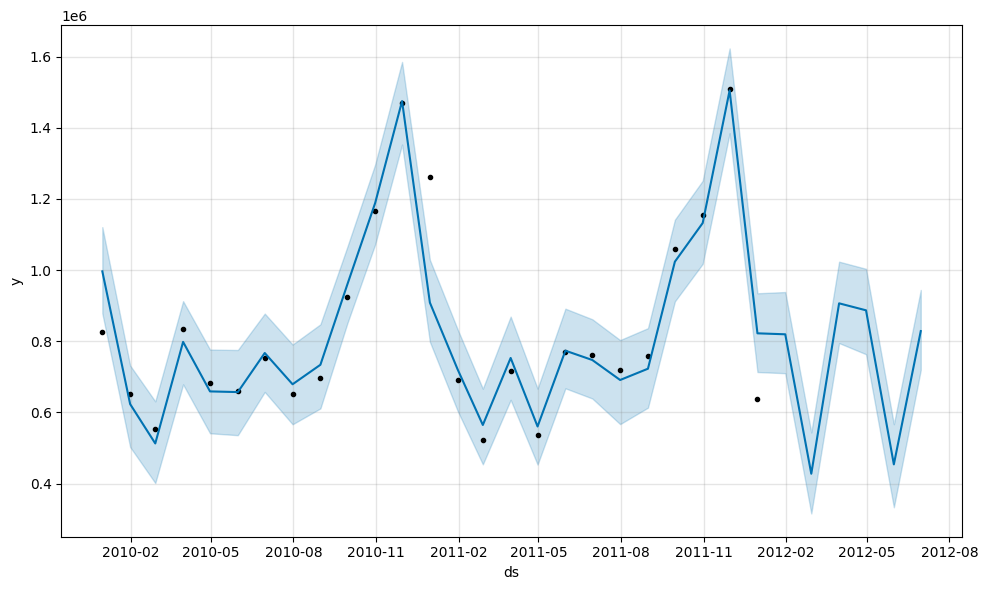

In [45]:
prophet_model.plot(forecast)
plt.show()

### Forecasting Insights

- Time series models successfully captured overall trends and seasonality in monthly sales data.
- Prophet provides robust forecasts with uncertainty intervals, making it suitable for business decision-making.
- Sales forecasting results can be directly integrated into the deployed web application for real-time insights.

# 08. Save Model

In [46]:
import joblib

joblib.dump(rf_model, 'rf_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
forecast.to_csv('sales_forecast.csv', index=False)
rfm.to_csv('rfm_data.csv')